## Douglas Decicino de Andrade

### Nº USP: 10883512


In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [2]:
#Entrada dos dados
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Avaliando dimensão dos dados.
print(train.shape)
print(test.shape)

(142404, 29)
(142403, 29)


In [4]:
#Definindo o que é X_train, y_train, X_test e y_test
X_train = train.iloc[:,0:-1]
y_train = train.iloc[:,-1]

X_test = test.iloc[:,0:-1]
y_test = test.iloc[:,-1]

# Questão 1

### a)

Vamos analisar se nossas classes estão balanceadas em relação a quantidade de observações para a variável resposta Class

In [4]:
train['Class'].value_counts()

0    142135
1       269
Name: Class, dtype: int64

In [5]:
test['Class'].value_counts()

0    142180
1       223
Name: Class, dtype: int64

#### Podemos perceber um enorme desbalanceamento no conjunto de dados, onde o número de observações que são fraudes é bem menor do que o número de observações que não são fraudes. Portanto, a melhor métrica a ser utilizada para avaliação do modelo é  a AUC.

### b)

Vamos realizar um estudo mais visual para tentarmos entender esse cenário de modelo aleatório, assim como outro cenários. Para isso, primeiramente vamos construir uma função que gera um vetor de predições baseados em uma determinada probabilidade de decisão, que irá definir qual será o valor mínimo da probabilidade gerada para falarmos que uma transação é fraude.

In [5]:
def modelo_aleatorio(prob):
    y_pred = []
    for i in (np.arange(0,len(y_train))):
        u = np.random.uniform(0,1,1) #Gerando um número aleatório entre 0 e 1 com uma distribuição uniforme.
        if u > prob: #Se esse número for maior que uma certa probabilidade, 
            y_pred.append(1) #Dizemos que uma observação é fraude
        elif u < prob: #Se esse número não for maior que essa probabilidade,
            y_pred.append(0) #Dizemos que uma observação não é fraude
    return y_pred

Agora vamos gerar diferentes cenários utilizando um looping, que vai variar essa minha probabilidade de decisão e guardar os valores de acurácia e AUC respectivos.

In [6]:
acc = []
auc = []
prob = []
for i in (np.arange(0,1,0.01)):
    y_pred = modelo_aleatorio(i)
    prob.append(i)
    auc.append(roc_auc_score(y_true = y_train, y_score = y_pred))
    acc.append(accuracy_score(y_true = y_train, y_pred = y_pred))

Após isso vamos montar um gráfico para ver como nossa AUC e nossa acurácia se sairam para os diferentes valores da probabilidade.

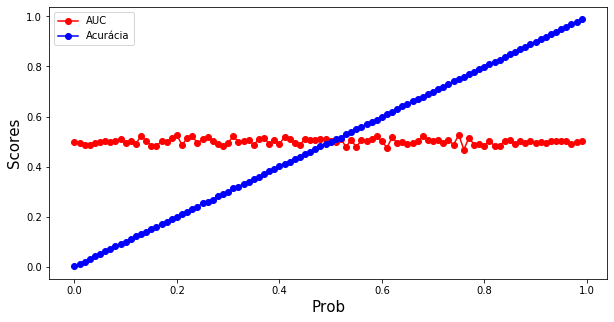

In [7]:
plt.figure(figsize=(10,5))
plt.plot(prob, auc, '-ro', label= 'AUC')
plt.plot(prob, acc, '-bo', label = 'Acurácia')
plt.xlabel('Prob', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.legend()
plt.show()

Temos que, respondendo a pergunta do item a), no caso de termos um modelo aleatório (quando a probabilidade de decisão é igual a 0.5), vamos obter acurácia e AUC aproximadamente iguais, variando muito pouco em torno de 0.5.

Porém, é interessante notar que, conforme aumentamos essa probabilidade de decisão, a acurária aumenta até ficar próximo de 1, enquanto que a AUC se mantém constante. Isso ocorre pelo fato de que temos um conjunto de dados muito desbalanceado. Conforme vamos aumetando a probabilidade de decisão, para valores maiores que 0.9, por exemplo, estamos obtendo observações da variável resposta fraude cada vez mais próximas da proporção "real" dos nossos dados, dizendo que mais de 90% das nossas observações não são fraude. E ao utilizarmos uma métrica como acurácia, que não leva em conta falso positivo e falso negativo, obtemos uma acurácia muito boa, porém que não nos diz a realidade sobre como nosso modelo está performando.

Isso não acontece com a AUC, que acaba levando em conta também os falsos negativos e os falsos positivos, não alterando muito seus valores, independente da nossa probabilidade de decisão do que seria fraude ou não.

De uma maneira simples, com um desbalanceamento de aproximadamente 0.0019, que é nosso caso, se chutarmos que todas as observações não são fraudes, teremos uma acurácia de 0.9981


# Questão 2

### a)

# $\alpha$ = 0

In [81]:
model0 = MLPClassifier(
    hidden_layer_sizes=(20,20,20,20,20),
    activation = 'relu',
    alpha=0.0,
    random_state=42
)

In [82]:
model0.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [83]:
y_pred = model0.predict(X_test)
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print(AUC)

0.8913357475870606


# $\alpha$ = 0.01

In [84]:
model1 = MLPClassifier(
    hidden_layer_sizes=(20,20,20,20,20),
    activation = 'relu',
    alpha=0.01,
    random_state=42
)

In [85]:
model1.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
y_pred = model1.predict(X_test)
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.8896808788455485


# $\alpha$ = 0.1

In [87]:
model2 = MLPClassifier(
    hidden_layer_sizes=(20,20,20,20,20),
    activation = 'relu',
    alpha=0.1,
    random_state=42
)

In [88]:
model2.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [89]:
y_pred = model2.predict(X_test)
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.8922043648328054


# $\alpha$ = 1

In [90]:
model3 = MLPClassifier(
    hidden_layer_sizes=(20,20,20,20,20),
    activation = 'relu',
    alpha=1,
    random_state=42
)

In [91]:
model3.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [92]:
y_pred = model3.predict(X_test)
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.600896860986547


# $\alpha$ = 10

In [93]:
model4 = MLPClassifier(
    hidden_layer_sizes=(20,20,20,20,20),
    activation = 'relu',
    alpha=10,
    random_state=42
)

In [94]:
model4.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20, 20, 20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [95]:
y_pred = model4.predict(X_test)
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.5


#### Como podemos ver, para taxas de regularização 0.0, 0.01 e 0.1 o modelo não apresentou grandes diferenças em relação à métrica escolhida, porém, quando aumentamos muito a taxa de regularização, o modelo acaba perdendo muito poder, produzindo cada vez mais um resultado menos satisfatório.

# Questão 3

#### GridSearch

In [5]:
# Encontrando os melhores hiperparâmetros para o modelo KNN.
parameters = {'n_neighbors': [3,5,7]}
modelknn = KNeighborsClassifier()
grid_search_cv = GridSearchCV(modelknn, param_grid = parameters, cv = 3 ,scoring='roc_auc',n_jobs = -1) #GridSearchCV usa validação cruzada
result = grid_search_cv.fit(X_train, y_train)                                               #estratificada, o que é o certo 
best_model = result.best_estimator_                                                         #quando temos uma base desbalanceada

In [6]:
print('Melhor número de vizinhos:', best_model.n_neighbors, "\n")

Melhor número de vizinhos: 7 



In [29]:
# Encontrando os melhores hiperparâmetros para o modelo de Redes Neurais.
parameters = {'hidden_layer_sizes': [(),(10),(5,5)]}
modelnn = MLPClassifier()
grid_search_cv = GridSearchCV(modelnn, param_grid = parameters, cv = 3 ,scoring='roc_auc',n_jobs = -1)
result = grid_search_cv.fit(X_train, y_train)
best_model = result.best_estimator_

In [32]:
print('Melhor número de parâmetros:', best_model.hidden_layer_sizes, "\n")

Melhor número de parâmetros: 10 



Ou seja, a melhor combinação de hiperparâmetros para o modelo de Redes Neurais é uma camada com 10 neurônios.

#### Comparando agora os dois modelos com os melhores hiperparâmetros no conjunto de teste.

##### Rede Neural

In [18]:
best_NN_model = MLPClassifier(
    hidden_layer_sizes=(10),
    random_state=42)

In [19]:
best_NN_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
%%time
y_pred_RN = best_NN_model.predict(X_test)

Wall time: 34 ms


In [21]:
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.8829192547563343


##### KNN

In [16]:
best_model_knn = KNeighborsClassifier(n_neighbors = 7)

In [17]:
best_model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [13]:
%%time
y_pred_KNN = best_model_knn.predict(X_test)

Wall time: 15min 34s


In [14]:
AUC = roc_auc_score(y_true = y_test, y_score = y_pred)
print("A área abaixo da curva ROC (AUC) é : ",AUC)

A área abaixo da curva ROC (AUC) é :  0.8562736586667441


# a) 
#### A técnica que obteve o melhor resultado foi a Rede Neural com uma AUC de 0.88

# b)
#### A técnica que mais demora para gerar as previsões nos dados de teste é a KNN, levando cerca de 15 minutos para gerar as predições do modelo.

# Questão 4

#### Como podemos ver no item a) da questão 3, o melhor modelo de acordo com a métrica escolhida foi a Rede Neural, portanto, vamos utilizar ele para o calculo do lucro no conjunto de teste.

Abaixo temos o cálculo dos scores para o conjunto de teste.

In [22]:
scores = best_NN_model.predict_proba(X_test)

As probabilidades de cada transação ser fraude são:

In [14]:
scores[:,1]

array([7.18291665e-05, 9.57513419e-01, 6.74452913e-05, ...,
       4.63680061e-05, 2.22936579e-03, 5.62733958e-04])

In [35]:
#Dataframe contendo os scores, o y predito e o y real.
data = {'scores':  scores[:,1],
        'y_pred': y_pred_RN,
        'y_real': y_test}

data = pd.DataFrame (data, columns = ['scores','y_pred','y_real'])

Temos que o número respectivo à 1% dos scores de um total de 142403 scores é 1424.03, então, vamos arredondar para 1424 e realizar os cálculos.

In [37]:
#Dataframe com as 1424 observações respectivas aos top 1% scores
dados_cenario = data.sort_values(by=['scores'], ascending=False).iloc[:1424,] 

In [39]:
dados_cenario.iloc[:,1] = 1 #Passando todos os valores de y predito para 1 (fraude)

In [41]:
dados_cenario

,scores,y_pred,y_real
101345,0.999996,1,1
101295,0.999995,1,1
101444,0.999992,1,1
11419,0.999992,1,1
101600,0.999985,1,1
...,...,...,...
134219,0.063977,1,0
139901,0.063918,1,0
84482,0.063902,1,0
15080,0.063855,1,0


Vamos criar uma função genérica que calcula o lucro obtido para um determinado cenário

In [59]:
def lucro(df):
    lucro = 0
    for index, row in dados_cenario.iterrows():
            if (row['y_pred'] == 1 and row['y_real'] == 1): #Se o y predito for igual ao  real,
                lucro = lucro + 100                         #temos um lucro de R$100
                
            elif (row['y_real'] == 0 and row['y_pred'] == 1): #Se o y real for 0 (não fraude) e o y predito for 1 (fraude),
                lucro = lucro - 2                             #temos um prejuizo de R$2
    print('O lucro obtido com o cenário fornecido é de: ', lucro,'R$')

In [60]:
lucro(dados_cenario)

O lucro obtido com o cenário fornecido é de:  16430 R$


# Questão 5

Vamos primeiramente encontrar qual a taxa de regularização irá produzir o melhor resultado para os nossos dados e, após isso, treinar o modelo utilizando esta taxa de regularização e analisar os pesos respectivos a cada feature. Lembrando que irei utilizar a regularização l1, que é a regularização que nos permite zerar os pesos para aquelas features "não importantes".

In [22]:
# Encontrando os melhores hiperparâmetros para o modelo.
parameters = {'alpha': [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50]}
modelSGD = SGDClassifier(loss='log', random_state=42, penalty= 'l1')
grid_search_cv = GridSearchCV(modelSGD, param_grid = parameters, cv = 3 ,scoring='roc_auc',n_jobs = -1) #GridSearchCV usa validação cruzada
result = grid_search_cv.fit(X_train, y_train)                                               #estratificada, o que é o certo 
best_model = result.best_estimator_                                                         #quando temos uma base desbalanceada

In [23]:
print('Melhor alpha:', best_model.alpha, "\n")

Melhor alpha: 0.01 



Vemos então que o parâmetro alpha de regularização que produz o melhor resultado com a métrica AUC é 0.01, agora vamos treinar o modelo com esse valor

In [26]:
modelSGD = SGDClassifier(loss='log', random_state=42, penalty= 'l1',alpha = best_model.alpha)

In [27]:
modelSGD.fit(X_train, y_train)

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [61]:
variaveis = list(train.iloc[:,0:-1].columns) #Lista com o nome das nossas variáveis (features).

In [68]:
pesos = np.array(modelSGD.coef_).tolist()[0] #Lista com pesos de cada variável.

Vamos agora criar um dataframe com uma coluna contendo as variáveis e outra coluna contendo os pesos respectivos a essas variáveis.

In [74]:
var_pesos = {'Variáveis':  variaveis,
        'Pesos': pesos}

var_pesos = pd.DataFrame (data, columns = ['Variáveis','Pesos'])
var_pesos

,Variáveis,Pesos
0,V1,26.146938
1,V2,23.836379
2,V3,-3.235134
3,V4,-1.580059
4,V5,-10.269293
5,V6,0.000000
6,V7,0.000000
7,V8,0.000000
8,V9,0.000000
9,V10,0.000000


Agora vamos ver quais são as variáveis que possuem peso igual a 0. E essas serão as variáveis selecionadas como não importantes de acordo com os pesos, sendo assim,

In [79]:
print('As variáveis não importantes para o nosso modelo são: \n ',var_pesos.loc[var_pesos['Pesos']==0]['Variáveis'])

As variáveis não importantes para o nosso modelo são: 
  5      V6
6      V7
7      V8
8      V9
9     V10
10    V11
11    V12
12    V13
13    V14
15    V16
17    V18
18    V19
21    V22
23    V24
24    V25
25    V26
26    V27
27    V28
Name: Variáveis, dtype: object
